In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = True
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [2]:
%cd ~/programs/avid

/home/nicholas/programs/avid


In [3]:
from pathlib import Path
import pyrallis
from avid.config import MainConfig
import orbax.checkpoint as ocp

from avid.training_state import TrainingRun
from avid.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
run_dir = Path('logs') / 'e_form_no_downsample_564'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

ckpt = best_ckpt(run_dir)

2024-03-17 22:51:53.866456: E external/tsl/tsl/util/command_line_flags.cc:108] Couldn't interpret value true" for flag xla_gpu_enable_async_all_reduce.


Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nicholas/programs/avid/logs/e_form_no_downsample_564/final_ckpt/ckpts

Restoring item from /home/nicholas/programs/avid/logs/e_form_no_downsample_564/final_ckpt/ckpts/9567.

Finished restoring checkpoint from                                                                                 
/home/nicholas/programs/avid/logs/e_form_no_downsample_564/final_ckpt/ckpts/9567.

In [4]:
from avid.utils import debug_structure


debug_structure(ckpt['state']);

arg0
├── last_grad_norm
│   └── float32[]
├── metrics
│   ├── _reduction_counter >>> value
│   │   └── int32[]
│   ├── grad_norm
│   │   ├── count
│   │   │   └── int32[]
│   │   └── total
│   │       └── float32[]
│   ├── loss
│   │   ├── count
│   │   │   └── int32[]
│   │   └── total
│   │       └── float32[]
│   ├── mae
│   │   ├── count
│   │   │   └── int32[]
│   │   └── total
│   │       └── float32[]
│   └── rmse
│       ├── count
│       │   └── int32[]
│       └── total
│           └── float32[]
├── opt_state
│   ├── 0
│   │   ├── 0
│   │   │   ├── count
│   │   │   │   └── int32[]
│   │   │   ├── mu >>> params
│   │   │   │   ├── encoder
│   │   │   │   │   └── {...}
│   │   │   │   ├── head
│   │   │   │   │   └── {...}
│   │   │   │   ├── im_embed
│   │   │   │   │   └── {...}
│   │   │   │   └── spec_embed
│   │   │   │       └── {...}
│   │   │   └── nu >>> params
│   │   │       ├── encoder
│   │   │       │   └── {...}
│   │   │       ├── head
│   │   │       │   └── {...}
│   │   │       ├── im_embed
│   │   │       │   └── {...}
│   │   │       └── spec_embed
│   │   │           └── {...}
│   │   ├── 1
│   │   │   └── NoneType=|
│   │   └── 2 >>> count
│   │       └── int32[]
│   └── 1
│       └── NoneType=|
├── params >>> params
│   ├── encoder
│   │   ├── encoder_norm
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── scale
│   │   │       └── float32[256]
│   │   ├── encoderblock_0
│   │   │   ├── LayerNorm_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[256]
│   │   │   │   └── scale
│   │   │   │       └── float32[256]
│   │   │   ├── LayerNorm_1
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[256]
│   │   │   │   └── scale
│   │   │   │       └── float32[256]
│   │   │   ├── LazyInMLP_0 >>> Dense_0
│   │   │   │   ├── bias
│   │   │   │   │   └── float32[256]
│   │   │   │   └── kernel
│   │   │   │       └── float32[256, 256]
│   │   │   └── MultiHeadDotProductAttention_0
│   │   │       ├── key
│   │   │       │   └── {...}
│   │   │       ├── out
│   │   │       │   └── {...}
│   │   │       ├── query
│   │   │       │   └── {...}
│   │   │       └── value
│   │   │           └── {...}
│   │   └── encoderblock_1
│   │       ├── LayerNorm_0
│   │       │   ├── bias
│   │       │   │   └── float32[256]
│   │       │   └── scale
│   │       │       └── float32[256]
│   │       ├── LayerNorm_1
│   │       │   ├── bias
│   │       │   │   └── float32[256]
│   │       │   └── scale
│   │       │       └── float32[256]
│   │       ├── LazyInMLP_0 >>> Dense_0
│   │       │   ├── bias
│   │       │   │   └── float32[256]
│   │       │   └── kernel
│   │       │       └── float32[256, 256]
│   │       └── MultiHeadDotProductAttention_0
│   │           ├── key
│   │           │   └── {...}
│   │           ├── out
│   │           │   └── {...}
│   │           ├── query
│   │           │   └── {...}
│   │           └── value
│   │               └── {...}
│   ├── head >>> Dense_0
│   │   ├── bias
│   │   │   └── float32[1]
│   │   └── kernel
│   │       └── float32[256, 1]
│   ├── im_embed >>> inner
│   │   ├── Patchify_0 >>> patch_proj
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── kernel
│   │   │       └── float32[1728, 256]
│   │   └── pos_embed >>> pos_embedding
│   │       └── bfloat16[512, 256]
│   └── spec_embed >>> species_embed
│       ├── embed_module >>> Dense_0
│       │   ├── bias
│       │   │   └── float32[64]
│       │   └── kernel
│       │       └── float32[64, 64]
│       └── species_embed >>> embedding
│           └── float32[56, 63]
└── step
    └── int32[]

In [5]:
params = ckpt['state']['params']['params']
debug_structure(params);

arg0
├── encoder
│   ├── encoder_norm
│   │   ├── bias
│   │   │   └── float32[256]
│   │   └── scale
│   │       └── float32[256]
│   ├── encoderblock_0
│   │   ├── LayerNorm_0
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── scale
│   │   │       └── float32[256]
│   │   ├── LayerNorm_1
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── scale
│   │   │       └── float32[256]
│   │   ├── LazyInMLP_0 >>> Dense_0
│   │   │   ├── bias
│   │   │   │   └── float32[256]
│   │   │   └── kernel
│   │   │       └── float32[256, 256]
│   │   └── MultiHeadDotProductAttention_0
│   │       ├── key
│   │       │   ├── bias
│   │       │   │   └── float32[4, 64]
│   │       │   └── kernel
│   │       │       └── float32[256, 4, 64]
│   │       ├── out
│   │       │   ├── bias
│   │       │   │   └── float32[256]
│   │       │   └── kernel
│   │       │       └── float32[4, 64, 256]
│   │       ├── query
│   │       │   ├── bias
│   │       │   │   └── float32[4, 64]
│   │       │   └── kernel
│   │       │       └── float32[256, 4, 64]
│   │       └── value
│   │           ├── bias
│   │           │   └── float32[4, 64]
│   │           └── kernel
│   │               └── float32[256, 4, 64]
│   └── encoderblock_1
│       ├── LayerNorm_0
│       │   ├── bias
│       │   │   └── float32[256]
│       │   └── scale
│       │       └── float32[256]
│       ├── LayerNorm_1
│       │   ├── bias
│       │   │   └── float32[256]
│       │   └── scale
│       │       └── float32[256]
│       ├── LazyInMLP_0 >>> Dense_0
│       │   ├── bias
│       │   │   └── float32[256]
│       │   └── kernel
│       │       └── float32[256, 256]
│       └── MultiHeadDotProductAttention_0
│           ├── key
│           │   ├── bias
│           │   │   └── float32[4, 64]
│           │   └── kernel
│           │       └── float32[256, 4, 64]
│           ├── out
│           │   ├── bias
│           │   │   └── float32[256]
│           │   └── kernel
│           │       └── float32[4, 64, 256]
│           ├── query
│           │   ├── bias
│           │   │   └── float32[4, 64]
│           │   └── kernel
│           │       └── float32[256, 4, 64]
│           └── value
│               ├── bias
│               │   └── float32[4, 64]
│               └── kernel
│                   └── float32[256, 4, 64]
├── head >>> Dense_0
│   ├── bias
│   │   └── float32[1]
│   └── kernel
│       └── float32[256, 1]
├── im_embed >>> inner
│   ├── Patchify_0 >>> patch_proj
│   │   ├── bias
│   │   │   └── float32[256]
│   │   └── kernel
│   │       └── float32[1728, 256]
│   └── pos_embed >>> pos_embedding
│       └── bfloat16[512, 256]
└── spec_embed >>> species_embed
    ├── embed_module >>> Dense_0
    │   ├── bias
    │   │   └── float32[64]
    │   └── kernel
    │       └── float32[64, 64]
    └── species_embed >>> embedding
        └── float32[56, 63]

In [27]:
from avid.utils import ELEM_VALS
spec_emb = params['spec_embed']['species_embed']['species_embed']['embedding']

spec_df = pd.DataFrame(spec_emb, index=ELEM_VALS)
spec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
Li,0.028681,-0.006146,0.029778,-0.040192,0.033692,-0.050687,0.081039,-0.131384,-0.114878,0.037858,...,0.040740,-0.003704,0.005216,0.003400,-0.015871,0.018517,0.029663,0.079356,0.076807,0.005265
Be,-0.023000,-0.014588,0.176342,0.037023,-0.060061,-0.125894,0.018035,0.065193,-0.054675,0.043676,...,0.022198,-0.033760,0.026929,-0.000954,0.121917,0.055199,0.111866,0.105226,-0.015317,0.059207
B,0.062191,-0.007302,0.086686,0.085336,-0.042177,-0.103152,0.044740,0.150101,-0.076790,0.145201,...,-0.056438,-0.060461,-0.079415,0.047587,0.126629,0.148852,0.166428,0.076227,-0.029626,0.013651
N,0.011613,0.002463,-0.010436,0.029623,0.015453,-0.029985,-0.007895,0.044072,-0.021345,-0.008093,...,0.001585,0.004087,0.005568,0.009821,0.019315,0.027507,0.035861,0.072128,-0.038749,0.012904
O,0.038009,-0.003416,-0.017059,0.004965,-0.011805,0.009838,0.028187,-0.035522,0.081144,-0.029621,...,0.016689,-0.014581,0.011731,-0.009312,-0.031847,-0.074378,-0.089086,-0.039996,0.003271,-0.032359


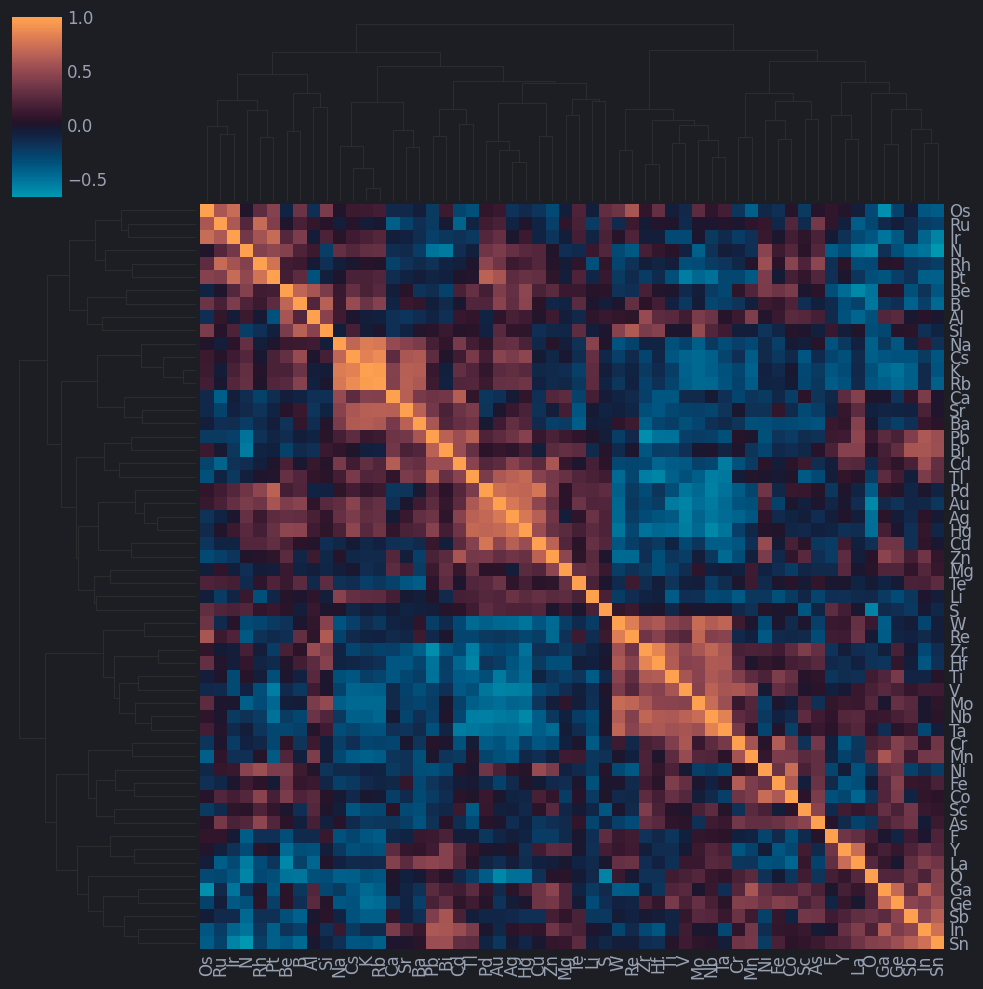

In [7]:
sns.clustermap(spec_df.T.corr(), xticklabels=1, yticklabels=1, cmap='rho_diverging', center=0)

In [12]:
from umap import UMAP
import plotly.express as px

umap = UMAP()

spec_df[['x', 'y']] = umap.fit_transform(spec_df.iloc[:63].values)

In [21]:
spec_df.columns = [str(c) for c in spec_df.columns]
px.scatter(spec_df.reset_index(), x='x', y='y', text='index', width=800, height=800, opacity=0)

<Axes: >

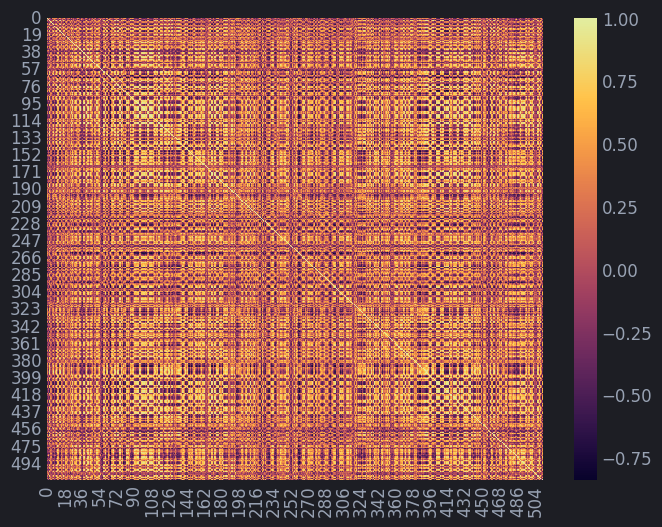

In [40]:
pos_emb = params['im_embed']['inner']['pos_embed']['pos_embedding'].astype(jnp.float32)
pos_corr = jnp.corrcoef(pos_emb)

sns.heatmap(pos_corr, cmap='rho_candela')

In [59]:
import functools as ft
from einops import rearrange, reduce

N_GRID = 8

grid_vals = jnp.linspace(0, 1, N_GRID + 1)[:-1]

xx, yy, zz = jnp.meshgrid(grid_vals, grid_vals, grid_vals)
xyz = rearrange(jnp.array([xx, yy, zz]), 'd n1 n2 n3 -> (n1 n2 n3) d')


cmap = rp.list_diverging

def plot(dens, n_skip=2, thresh=0, cmap=cmap):
    bg_mask = abs(dens) > thresh
    skip_mask = jnp.all(jnp.round(xyz * N_GRID) % n_skip == 0, axis=1)
    mask = skip_mask & bg_mask
    return px.scatter_3d(
        x=xyz[mask, 0],
        y=xyz[mask, 1],
        z=xyz[mask, 2],
        color=dens[mask] ** 3,
        # color=np.array(species[mask]).astype('str'),
        color_continuous_scale=cmap,
        color_continuous_midpoint=0,
        range_x=[0, 1], range_y=[0, 1], range_z=[0, 1],
        opacity=1,
    )

plot(pos_corr[73], n_skip=1)

<Axes: >

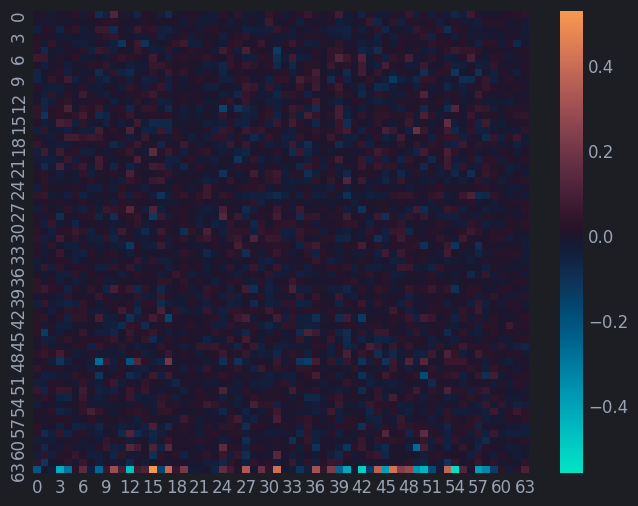

In [68]:
spec_embed = params['spec_embed']['species_embed']['embed_module']['Dense_0']['kernel']
sns.heatmap(spec_embed.astype(jnp.float32),
            cmap=rp.mpl_diverging, center=0)